In [1]:
import pandas as pd
import numpy as np
from google_play_scraper import reviews_all, Sort
import plotly.express as px


In [2]:
app_reviews = reviews_all(
    'com.depop',
    sort=Sort.NEWEST,
    sleep_milliseconds=0,
    lang='en',
    country='GB'
)


In [3]:
df = pd.json_normalize(app_reviews)
print(df.head())



                               reviewId        userName  \
0  02ddaee2-9265-4e47-8cc1-3c6d898c476a        Liza Lam   
1  875e5701-645a-4797-8909-351ddd946308  Rich Greengrin   
2  52e4ce01-93d2-4942-80bf-a78d86002bc4        Fabulous   
3  a613a285-23c8-42f7-acc6-9528e5102590       ian heath   
4  1fdc7c4d-cd61-4c6d-93ff-7637d80bb299           HX Re   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0  I deactivated the app after 2 weeks. Received ...      1              0   
1  Scamming app don't buy on this app Paid for 2 ...      1              0   
2                                                alr      5              0

In [4]:
print(df['score'].mean())


3.6570481272341087


In [5]:
import pandas as pd

# Assuming your DataFrame is named 'data'
# Let's say you want to drop columns named 'column1' and 'column2'
columns_to_drop = ['reviewId', 'userName','userImage']
df_reviews= df.drop(columns=columns_to_drop)

# Display the first few rows of the modified DataFrame
print(df_reviews.head())


                                             content  score  thumbsUpCount  \
0  I deactivated the app after 2 weeks. Received ...      1              0   
1  Scamming app don't buy on this app Paid for 2 ...      1              0   
2                                                alr      5              0   
3                                              great      5              0   
4  really like the app. so far great experiences....      5              0   

  reviewCreatedVersion                  at  \
0                2.276 2024-02-03 13:36:47   
1                2.275 2024-02-03 13:10:29   
2                2.275 2024-02-03 03:50:40   
3                2.275 2024-02-03 01:23:56   
4                2.275 2024-02-03 01:23:19   

                                        replyContent           repliedAt  \
0  Sometimes we do take steps to remove items fro... 2024-02-03 10:30:34   
1                                               None                 NaT   
2  Thanks for taking the t

In [6]:
import pandas as pd

# Assuming your DataFrame is named 'df_reviews' and the timestamp column is named 'at'

# Convert 'at' to datetime
df_reviews['at'] = pd.to_datetime(df_reviews['at'])

# Create a new column 'date' with only the date part
df_reviews['date'] = df_reviews['at'].dt.date

# Create a new column 'year' with only the year part
df_reviews['year'] = df_reviews['at'].dt.year



# Display the first few rows to verify
print(df_reviews.head())


                                             content  score  thumbsUpCount  \
0  I deactivated the app after 2 weeks. Received ...      1              0   
1  Scamming app don't buy on this app Paid for 2 ...      1              0   
2                                                alr      5              0   
3                                              great      5              0   
4  really like the app. so far great experiences....      5              0   

  reviewCreatedVersion                  at  \
0                2.276 2024-02-03 13:36:47   
1                2.275 2024-02-03 13:10:29   
2                2.275 2024-02-03 03:50:40   
3                2.275 2024-02-03 01:23:56   
4                2.275 2024-02-03 01:23:19   

                                        replyContent           repliedAt  \
0  Sometimes we do take steps to remove items fro... 2024-02-03 10:30:34   
1                                               None                 NaT   
2  Thanks for taking the t

In [7]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace 'df' with the name of your DataFrame variable

# Define the file path and name for your Excel file
excel_file_path = 'C:/Users/ASUS/OneDrive/Desktop/Job & Internship/PORTFOLIO/Depop Playstore Reviews/output_file.xlsx'

# Write the DataFrame to an Excel file
df_reviews.to_excel(excel_file_path, index=False)

print(f'DataFrame is written to Excel File successfully at {excel_file_path}')


DataFrame is written to Excel File successfully at C:/Users/ASUS/OneDrive/Desktop/Job & Internship/PORTFOLIO/Depop Playstore Reviews/output_file.xlsx


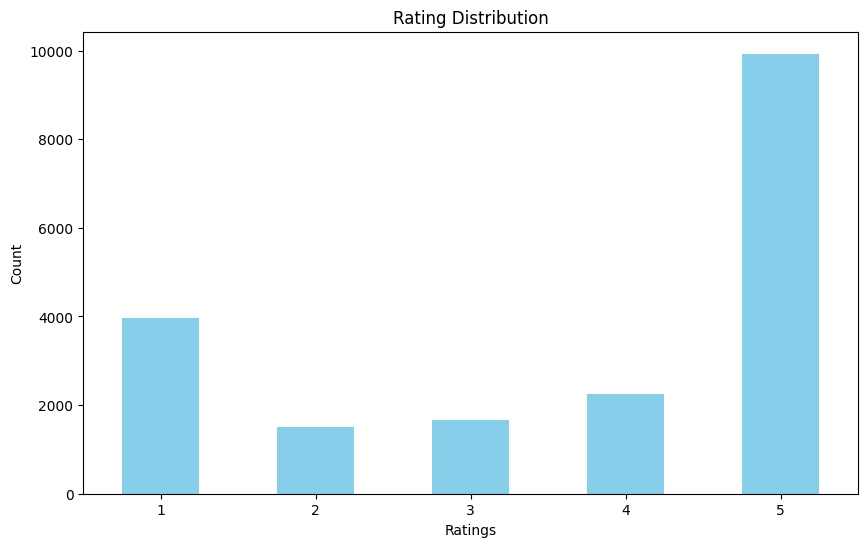

In [27]:
import matplotlib.pyplot as plt

# Assuming 'df_reviews' is your DataFrame and 'score' is the column with ratings

# Count the occurrences of each rating
rating_counts = df_reviews['score'].value_counts()

# Sort the ratings for better visualization (optional but recommended)
rating_counts = rating_counts.sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-labels to show them horizontally
plt.show()


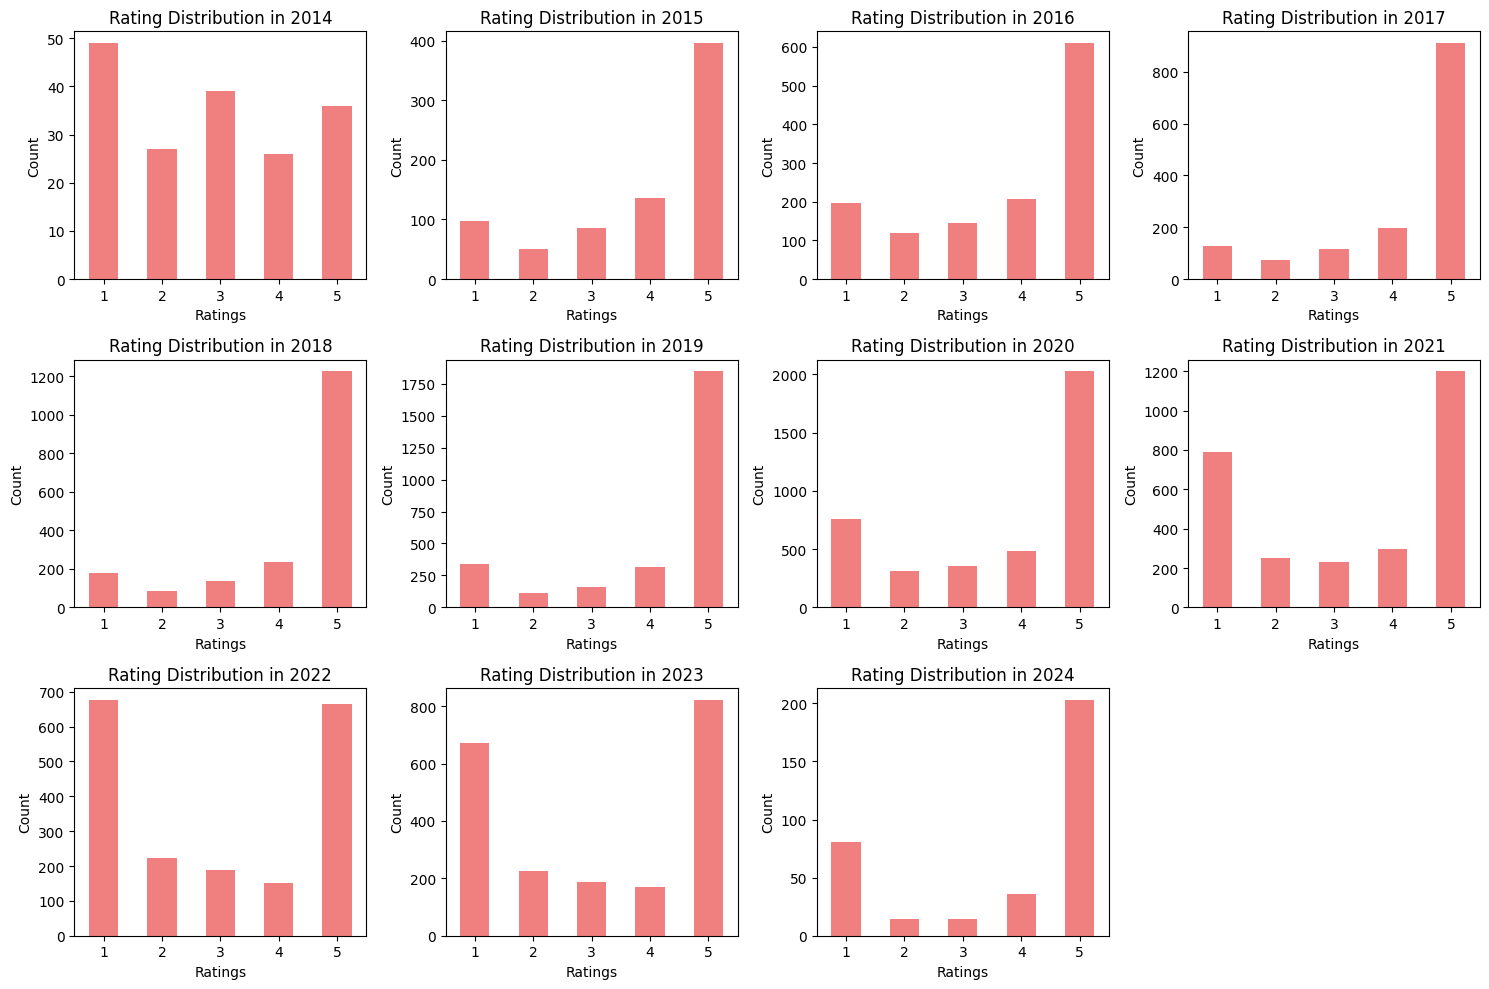

In [14]:
import matplotlib.pyplot as plt

# Assuming 'df_reviews' is your DataFrame, 'score' is the rating column, and 'year' is the year column

# Set the figure size for the plot
plt.figure(figsize=(15, 10))

# Loop through each year and plot the rating distribution
for i, year in enumerate(range(2014, 2025)):
    # Select the subset of the DataFrame for the specific year
    subset = df_reviews[df_reviews['year'] == year]
    
    # Count the occurrences of each rating for this year
    rating_counts = subset['score'].value_counts()

    # Sort the ratings for better visualization
    rating_counts = rating_counts.sort_index()

    # Create a subplot for each year
    plt.subplot(3, 4, i+1)  # Adjust the subplot grid as needed
    rating_counts.plot(kind='bar', color='lightcoral')
    plt.title(f'Rating Distribution in {year}')
    plt.xlabel('Ratings')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [7]:
df_version_reviews = df_reviews['reviewCreatedVersion'].value_counts().reset_index()
# Renaming the columns
df_version_reviews.columns = ['version', 'review_count']

How many reviews with each version of the app?

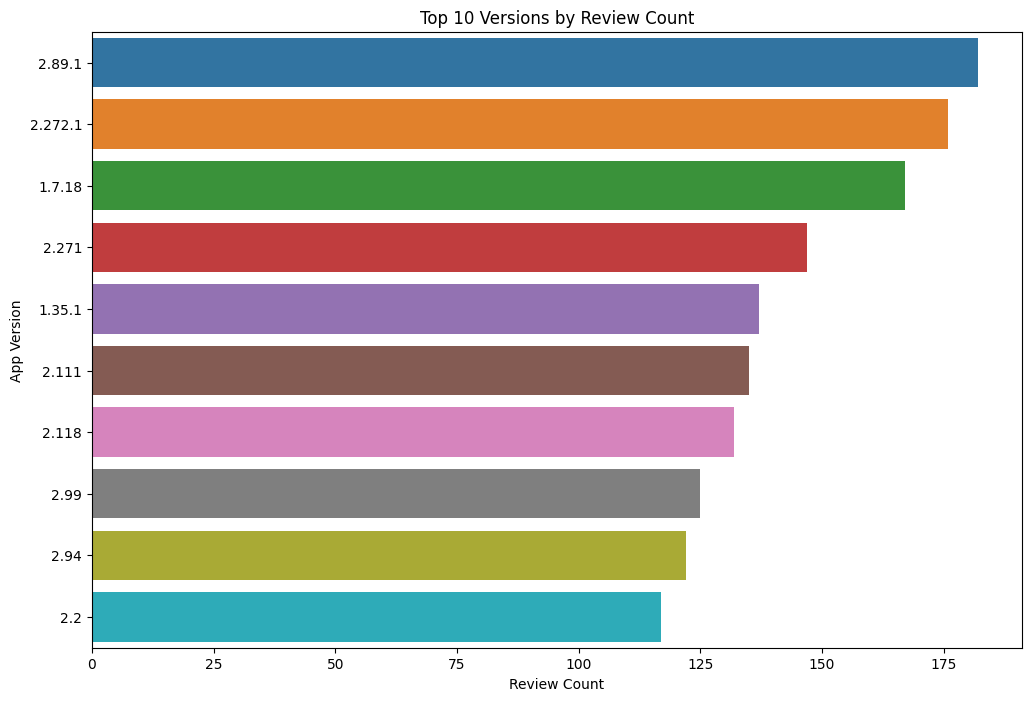

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_version_reviews is your DataFrame

# Selecting the top N versions
top_n = 10
df_top_versions = df_version_reviews.nlargest(top_n, 'review_count')

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='review_count', y='version', data=df_top_versions)

plt.title(f'Top {top_n} Versions by Review Count')
plt.xlabel('Review Count')
plt.ylabel('App Version')
plt.show()


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_reviews is your main DataFrame and it has 'year' and 'score' columns

# Group by 'year' and calculate the average 'score'
yearly_avg_score = df_reviews.groupby('year')['score'].mean().reset_index()




Are the reviews getting better or worse over time?

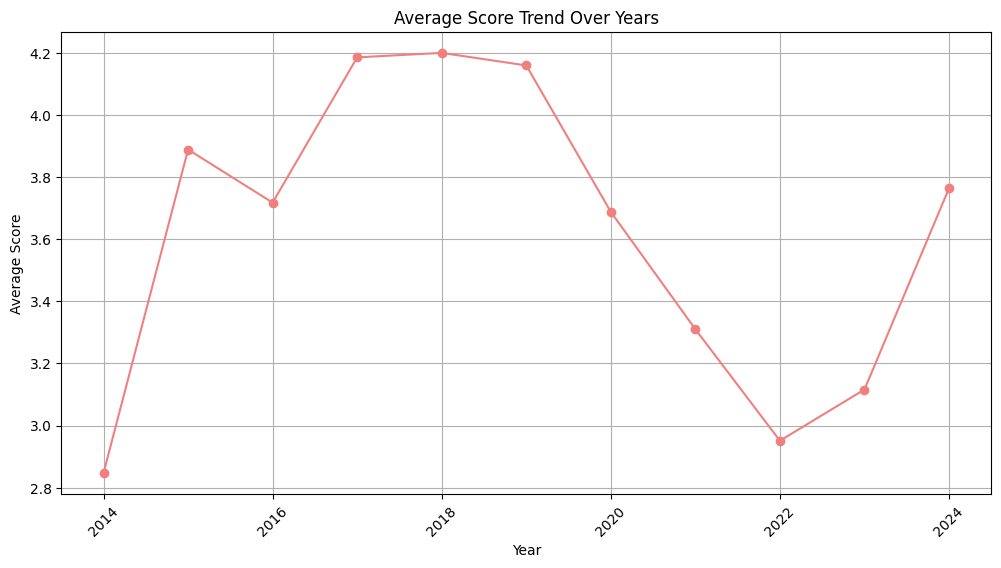

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Converting 'year' and 'score' to numpy arrays
years = np.array(yearly_avg_score['year'])
scores = np.array(yearly_avg_score['score'])

# Plotting with matplotlib
plt.figure(figsize=(12, 6))
plt.plot(years, scores, marker='o', linestyle='-',color='lightcoral')

plt.title('Average Score Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


1.We can further look into what version is related to 2017-2019. And what was so great about it ?
2. We can 

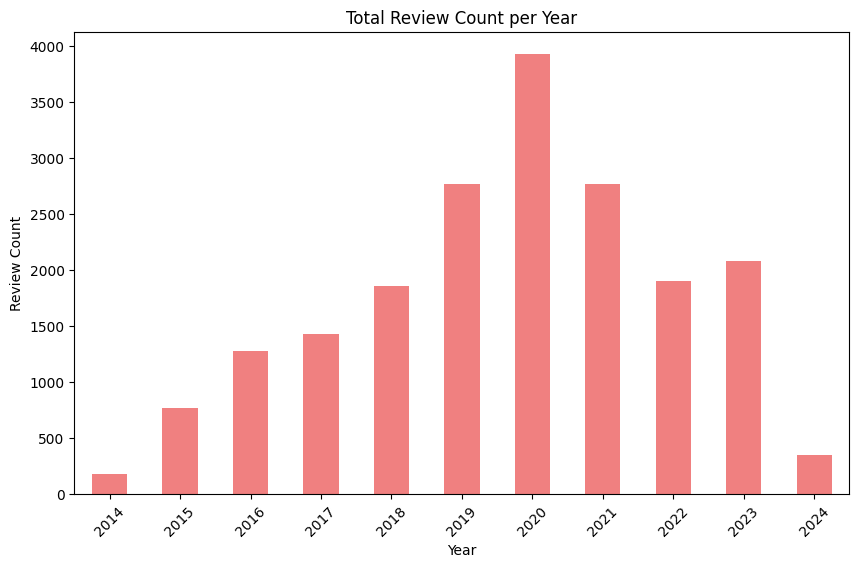

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_reviews is your DataFrame, 'score' is the column with ratings, and 'year' is the year column

# Group by 'year' and count the number of scores
score_counts_per_year = df_reviews.groupby('year')['score'].count()

# Set the size of the overall figure
plt.figure(figsize=(10, 6))

# Plot the total score count for each year
score_counts_per_year.plot(kind='bar', color='lightcoral')
plt.title('Total Review Count per Year')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.xticks(rotation=45)  # Rotate x-labels to show them horizontally

# Show the plot
plt.show()


In [15]:
# Make sure you've downloaded the necessary NLTK data

import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text, additional_stopwords=[], remove_from_stopwords=[]):
    # Check if text is None
    if text is None:
        return ''
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove emojis with a generalized regex pattern
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"  # dingbats
                           u"\U000024C2-\U0001F251"  # enclosed characters
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Modify stopwords
    stop_words = set(stopwords.words('english'))
    # Add additional stopwords
    stop_words.update(additional_stopwords)
    # Remove certain words from stopwords
    stop_words = stop_words - set(remove_from_stopwords)

    # Filter out stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Rejoin filtered tokens into a string
    return ' '.join(filtered_tokens)


# Define additional stopwords and stopwords to remove
additional_stopwords = ['ive', 'depop', 'item','dont','cant','people','im','anything','great','get','even','like','items','app']# Add more words as needed
remove_from_stopwords = []  # Add more words as needed

# Apply the preprocessing function with additional arguments
df_reviews['cleaned_review_text'] = df_reviews['content'].apply(lambda x: preprocess_text(x, additional_stopwords, remove_from_stopwords))


We will make a group of good years(2017-2019) and bad years (2020-2023). Analyse each seperately.

Taking only the reviews of rating 3 or less than 3 - Cause that will help us identify the problem

In [ ]:
low_score_reviews = df_reviews[df_reviews['score'] <= 3]


In the below code we are using text which doesnt have any punctuation or stop words 


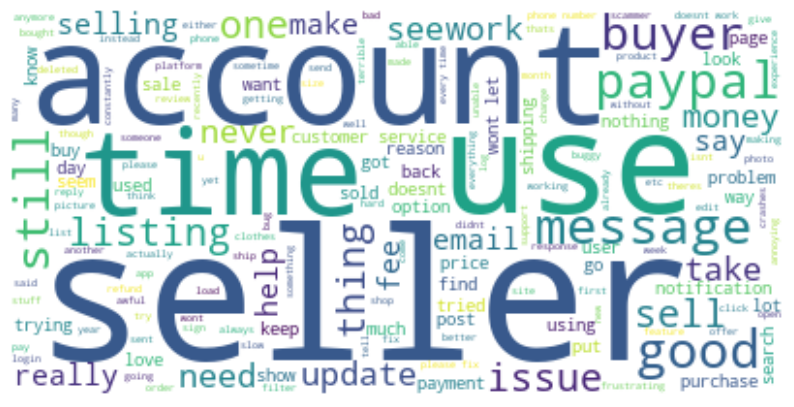

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
text = ' '.join(review for review in low_score_reviews['cleaned_review_text'])

# Create and generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Giving weight to thumbUp comment - Statistical Way !

In [15]:
low_score_reviews['thumbsUpWeight'] = low_score_reviews['thumbsUpCount'] / low_score_reviews['thumbsUpCount'].max()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21456\2449863235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_score_reviews['thumbsUpWeight'] = low_score_reviews['thumbsUpCount'] / low_score_reviews['thumbsUpCount'].max()


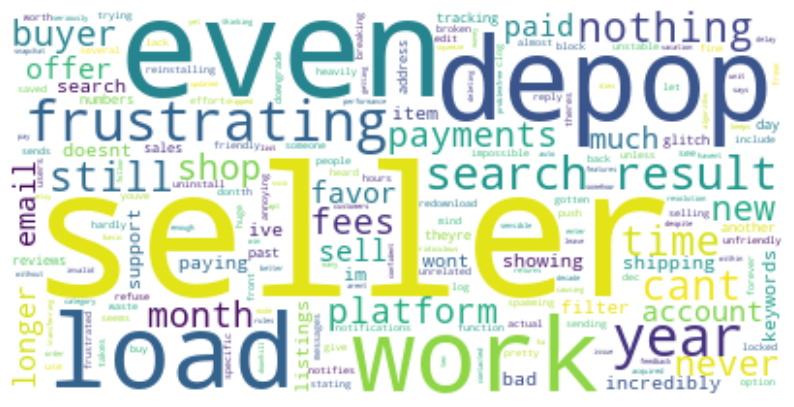

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate weighted text: repeat the review text by its weight (rounded to the nearest integer)
weighted_text = ' '.join([text * round(weight) for text, weight in zip(low_score_reviews['cleaned_review_text'], low_score_reviews['thumbsUpWeight'])])

# Create and generate a weighted word cloud image
wordcloud = WordCloud(background_color='white').generate(weighted_text)

# Display the generated Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Result: Gives you some idea of what the low raters are thinking about 

Lets try to visualise the count of most occuring words though bar chart 

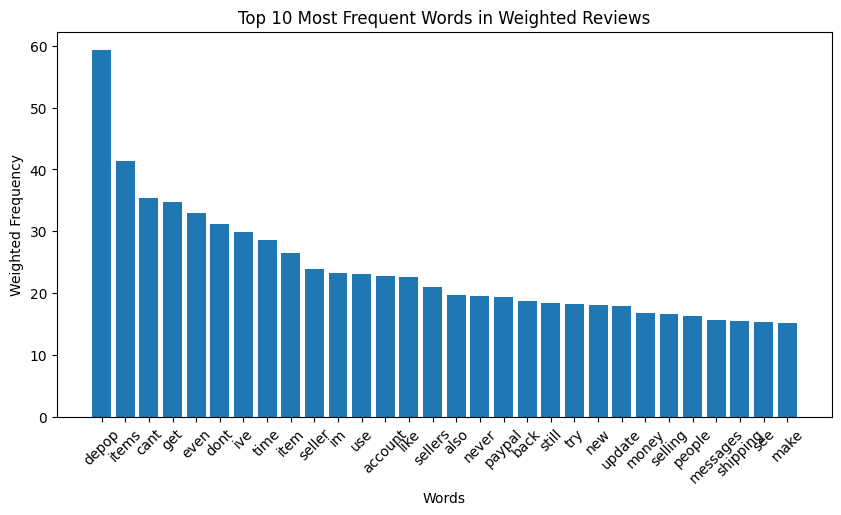

In [18]:
from collections import Counter
import matplotlib.pyplot as plt

# Step 1: Count the weighted frequency of words
weighted_word_counts = Counter()
for text, weight in zip(low_score_reviews['cleaned_review_text'], low_score_reviews['thumbsUpWeight']):
    for word in text.split():
        weighted_word_counts[word] += weight

# Step 2: Sort and select top words
# Let's say you want to display the top 10 words
top_words = dict(weighted_word_counts.most_common(30))

# Step 3: Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Words')
plt.ylabel('Weighted Frequency')
plt.title('Top 10 Most Frequent Words in Weighted Reviews')
plt.xticks(rotation=45)
plt.show()


Result: Doesnt give me a clear idea 

Have to apply in depth analysis - Word Association , LDA , NER 

In [19]:
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.tokenize import word_tokenize

# Assuming df_reviews['cleaned_review_text'] contains your preprocessed text
all_reviews = ' '.join(low_score_reviews['cleaned_review_text'])
tokens = word_tokenize(all_reviews)

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)
finder.apply_freq_filter(3)  # Only bigrams that appear 3+ times

# Find top 10 bigrams by their frequency
top_10_bigrams = finder.nbest(bigram_measures.pmi, 20)  # Change 10 to get more or fewer results
print(top_10_bigrams)


[('knock', 'offs'), ('wild', 'fable'), ('copied', 'pasted'), ('ali', 'express'), ('detected', 'malware'), ('south', 'african'), ('united', 'kingdom'), ('geared', 'towards'), ('circle', 'doom'), ('source', 'income'), ('factor', 'authentication'), ('third', 'party'), ('pixel', 'xl'), ('harsh', 'eyes'), ('along', 'lines'), ('suspicious', 'activity'), ('royal', 'mail'), ('united', 'states'), ('mom', 'jeans'), ('sole', 'purpose')]


In [20]:
import nltk
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk.tokenize import word_tokenize

# Assuming df_reviews['cleaned_review_text'] contains your preprocessed text
all_reviews = ' '.join(low_score_reviews['cleaned_review_text'])
tokens = word_tokenize(all_reviews)

trigram_measures = TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(tokens)
finder.apply_freq_filter(3)  # Only trigrams that appear 3+ times

# Find top 10 trigrams by their frequency
top_10_trigrams = finder.nbest(trigram_measures.pmi, 10)  # Change 10 to get more or fewer results
print(top_10_trigrams)


[('letters', 'numbers', 'underscore'), ('exposed', 'data', 'breach'), ('two', 'factor', 'authentication'), ('lower', 'case', 'letters'), ('case', 'letters', 'numbers'), ('constant', 'internal', 'server'), ('internal', 'server', 'errors'), ('internal', 'server', 'error'), ('something', 'along', 'lines'), ('photos', 'camera', 'roll')]


Applying LDA

In [21]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'low_score_reviews' is your DataFrame and 'cleaned_review_text' is the column with text data.

# Step 1: Tokenize the cleaned reviews
vectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(low_score_reviews['cleaned_review_text'])

# Step 2: Convert sparse matrix to gensim corpus
corpus = gensim.matutils.Sparse2Corpus(data_vectorized, documents_columns=False)

# Step 3: Mapping from word IDs to words (to see the actual words)
id_map = dict((v, k) for k, v in vectorizer.vocabulary_.items())

# Step 4: LDA model
ldamodel = LdaModel(corpus=corpus, id2word=id_map, num_topics=8, passes=25, random_state=34)

# Step 5: Print the topics
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.025*"load" + 0.024*"time" + 0.019*"great" + 0.017*"work" + 0.015*"messages" + 0.015*"doesnt" + 0.015*"good" + 0.015*"really" + 0.015*"love" + 0.013*"new"')
(1, '0.045*"let" + 0.043*"wont" + 0.042*"account" + 0.028*"password" + 0.028*"log" + 0.028*"tried" + 0.023*"phone" + 0.023*"try" + 0.020*"number" + 0.018*"ive"')
(2, '0.048*"messages" + 0.027*"notifications" + 0.016*"update" + 0.014*"message" + 0.012*"fix" + 0.012*"dont" + 0.011*"depop" + 0.011*"open" + 0.011*"ive" + 0.011*"user"')
(3, '0.031*"upload" + 0.028*"post" + 0.026*"items" + 0.024*"try" + 0.023*"sell" + 0.019*"item" + 0.019*"photos" + 0.017*"add" + 0.016*"keeps" + 0.016*"picture"')
(4, '0.036*"account" + 0.032*"service" + 0.032*"customer" + 0.029*"depop" + 0.020*"support" + 0.016*"help" + 0.015*"got" + 0.013*"reason" + 0.013*"terrible" + 0.011*"team"')
(5, '0.032*"search" + 0.030*"items" + 0.020*"update" + 0.019*"page" + 0.016*"fix" + 0.015*"view" + 0.015*"doesnt" + 0.014*"working" + 0.014*"depop" + 0.012*"work"')
(6

In [22]:
import spacy
from collections import Counter

# Load SpaCy's English language model
nlp = spacy.load('en_core_web_sm')

# Assuming 'low_score_reviews' is your DataFrame and 'cleaned_review_text' is the column with text data
# Concatenate all review texts (or you can process them individually)
all_reviews = ' '.join(low_score_reviews['cleaned_review_text'])

# Process the text with SpaCy
doc = nlp(all_reviews)

# Extract entities and count their occurrences
entities = [ent.text for ent in doc.ents if ent.label_ in ['ORG', 'PRODUCT', 'GPE']]
entity_freq = Counter(entities)

# Display the most common entities
print(entity_freq.most_common(10))


[('android', 25), ('samsung', 21), ('google', 11), ('un', 9), ('ps', 7), ('🤷', 5), ('canada', 5), ('united states', 5), ('apps', 5), ('uk', 4)]


In [30]:
import pandas as pd
from transformers import pipeline

# Load the sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Function to apply RoBERTa sentiment analysis
def get_roberta_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label']

# Assuming 'low_score_reviews' is your DataFrame and 'cleaned_review_text' contains the review texts
low_score_reviews['roberta_sentiment'] = low_score_reviews['cleaned_review_text'].apply(get_roberta_sentiment)

# Displaying the results
print(low_score_reviews[['cleaned_review_text', 'roberta_sentiment']].head())


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ASUS\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21456\3716190541.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_score_reviews['roberta_sentiment'] = low_score_reviews['cleaned_review_text'].apply(get_roberta_sentiment)


                                  cleaned_review_text roberta_sentiment
1   december asked refund still aint got anything ...          NEGATIVE
4   like depop service experience awful bombarded ...          NEGATIVE
6   glitchy creating sales posts despite recent up...          NEGATIVE
15  filter size still show mostly sxs makes hard s...          NEGATIVE
16  impossible edit listing change shipping addres...          NEGATIVE


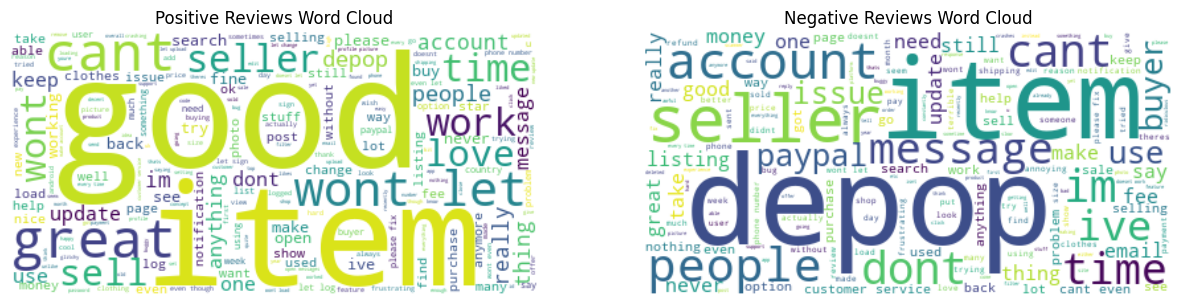

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'low_score_reviews' is your DataFrame, 'cleaned_review_text' is the text column
# and 'roberta_sentiment' is the column with sentiment labels from RoBERTa

# Split the DataFrame into positive and negative based on the sentiment
positive_reviews = low_score_reviews[low_score_reviews['roberta_sentiment'] == 'POSITIVE']['cleaned_review_text']
negative_reviews = low_score_reviews[low_score_reviews['roberta_sentiment'] == 'NEGATIVE']['cleaned_review_text']

# Join the reviews into one large string
positive_text = " ".join(review for review in positive_reviews)
negative_text = " ".join(review for review in negative_reviews)

# Generate word clouds
positive_wordcloud = WordCloud(background_color="white").generate(positive_text)
negative_wordcloud = WordCloud(background_color="white").generate(negative_text)

# Display the word clouds
plt.figure(figsize=(15, 7.5))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()


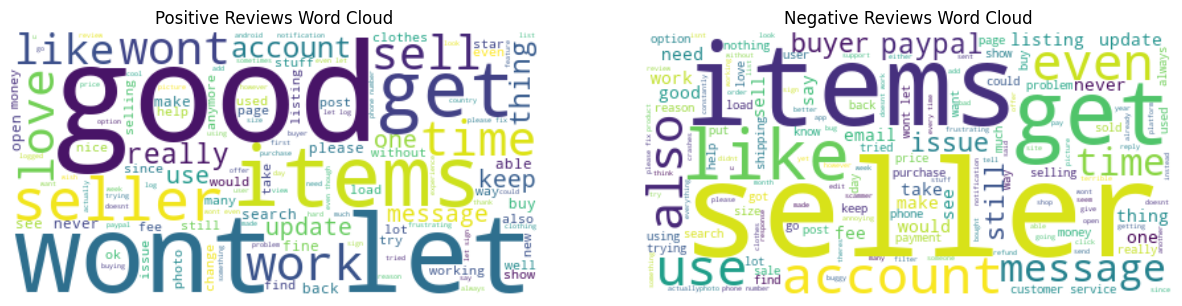

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define your custom list of negative words to exclude
custom_negative_stopwords = {'ive', 'depop', 'item','dont','cant','people','im','anything','great','get','even','like','items'}  # Replace with your actual words to exclude

# Assuming 'low_score_reviews' is your DataFrame, 'cleaned_review_text' is the text column,
# and 'roberta_sentiment' is the column with sentiment labels from RoBERTa

# Filter the DataFrame for positive and negative sentiments
positive_reviews = low_score_reviews[low_score_reviews['roberta_sentiment'] == 'POSITIVE']['cleaned_review_text']
negative_reviews = low_score_reviews[low_score_reviews['roberta_sentiment'] == 'NEGATIVE']['cleaned_review_text']

# Function to concatenate reviews and remove custom negative words
def concatenate_and_filter_reviews(reviews, stopwords):
    text = " ".join(review for review in reviews if review not in stopwords)
    return text

# Concatenate reviews and filter out the custom negative stopwords
positive_text = concatenate_and_filter_reviews(positive_reviews, custom_negative_stopwords)
negative_text = concatenate_and_filter_reviews(negative_reviews, custom_negative_stopwords)

# Generate word clouds
positive_wordcloud = WordCloud(background_color="white", stopwords=custom_negative_stopwords).generate(positive_text)
negative_wordcloud = WordCloud(background_color="white", stopwords=custom_negative_stopwords).generate(negative_text)

# Display the word clouds
plt.figure(figsize=(15, 7.5))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()


In [34]:
from nrclex import NRCLex
import pandas as pd

# Function to get emotions from a text
def get_emotions(text):
    # Create a NRCLex object
    text_object = NRCLex(text)
    
    # Return the top emotion
    top_emotion = text_object.top_emotions[0]
    return top_emotion

# Apply the function to your DataFrame
low_score_reviews['top_emotion'] = low_score_reviews['cleaned_review_text'].apply(lambda x: get_emotions(x))

# Viewing the DataFrame with the top emotions
print(low_score_reviews[['cleaned_review_text', 'top_emotion']].head())


                                  cleaned_review_text  \
1   december asked refund still aint got anything ...   
4   like depop service experience awful bombarded ...   
6   glitchy creating sales posts despite recent up...   
15  filter size still show mostly sxs makes hard s...   
16  impossible edit listing change shipping addres...   

                       top_emotion  
1                  (negative, 1.0)  
4                    (anger, 0.15)  
6   (negative, 0.3333333333333333)  
15                    (trust, 1.0)  
16                    (fear, 0.25)  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21456\3900237578.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_score_reviews['top_emotion'] = low_score_reviews['cleaned_review_text'].apply(lambda x: get_emotions(x))


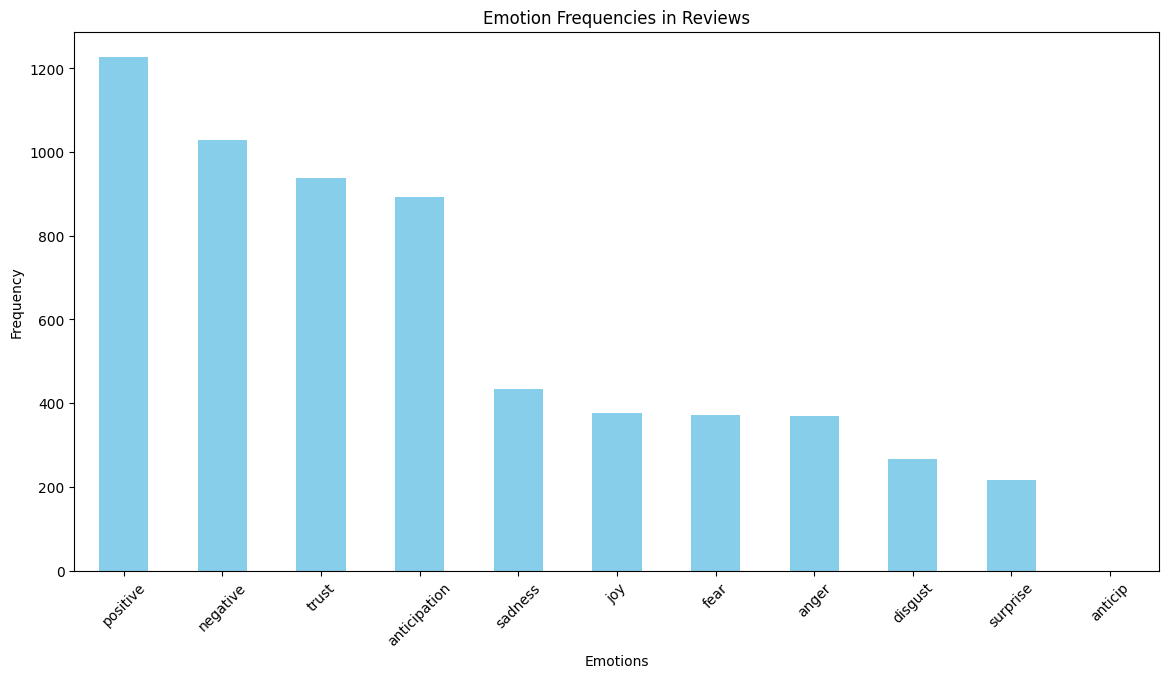

In [35]:
import pandas as pd
from nrclex import NRCLex
import matplotlib.pyplot as plt
from collections import defaultdict

# Assuming low_score_reviews['cleaned_review_text'] is your DataFrame's column with cleaned text

# Function to get emotion frequencies from a text
def get_emotion_frequencies(text):
    text_object = NRCLex(text)
    return text_object.affect_frequencies

# Apply the function to each review and create a new DataFrame with the emotions
emotion_df = low_score_reviews['cleaned_review_text'].apply(get_emotion_frequencies).apply(pd.Series)

# Sum up the emotion frequencies for all reviews
emotion_totals = emotion_df.sum().sort_values(ascending=False)

# Plotting the emotion frequencies
plt.figure(figsize=(14, 7))
emotion_totals.plot(kind='bar', color='skyblue')
plt.title('Emotion Frequencies in Reviews')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


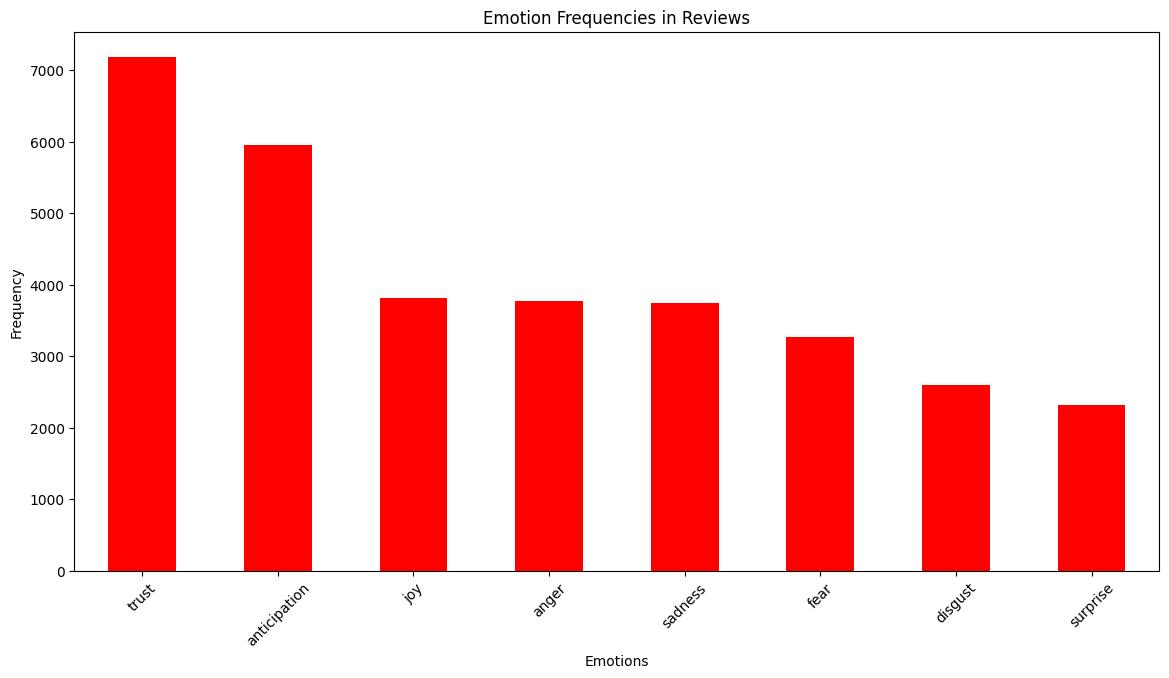

In [38]:
import pandas as pd
from nrclex import NRCLex
import matplotlib.pyplot as plt

# Assuming low_score_reviews['cleaned_review_text'] is your DataFrame's column with cleaned text

# Function to get emotion frequencies from a text
def get_emotion_frequencies(text):
    text_object = NRCLex(text)
    # Get the raw emotion scores
    emotion_freqs = text_object.raw_emotion_scores
    # Exclude 'positive' and 'negative' sentiments if present
    emotion_freqs.pop('positive', None)
    emotion_freqs.pop('negative', None)
    return emotion_freqs

# Apply the function to each review
emotion_freqs_list = low_score_reviews['cleaned_review_text'].apply(get_emotion_frequencies)

# Create a DataFrame from the list of emotion frequency dictionaries
emotion_df = pd.DataFrame(emotion_freqs_list.tolist())

# Sum up the emotion frequencies for all reviews
emotion_totals = emotion_df.sum().sort_values(ascending=False)

# Plotting the emotion frequencies
plt.figure(figsize=(14, 7))
emotion_totals.plot(kind='bar', color='red')
plt.title('Emotion Frequencies in Reviews')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
